In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/Hacka')

In [ ]:
import pickle
with open('sentiment_texts.pickle', 'rb') as f:
  data = pickle.load(f)
data = data[data['SentimentScore'] != 0]

In [ ]:
with open('mentions texts.pickle', 'rb') as f:
  df = pickle.load(f)
del df['messageid']
df = df[df['DatePosted'].dt.year == 2022]
df = df.sort_values(by='DatePosted', ascending=True)

In [ ]:
df = pd.read_csv('mentions texts.csv')

In [ ]:
full_name = pd.read_excel('issuers.xlsx')

In [ ]:
def zaebalo(id):
  print(df['MessageText'][df['MessageID'].eq(id).idxmax()])
  print(df[df['MessageID'] == id].shape[0])
  print(full_name['EMITENT_FULL_NAME'].loc[df.loc[df['MessageID'] == id, 'issuerid'] - 1])

–°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–∞–∑–º–µ—Ç–∫—É –≤ csv —Ñ–∞–π–ª

–û–±—É—á–µ–Ω–∏–µ

In [ ]:
train = pd.read_csv('preprocessed_data_1.csv')
train = train[train['sentiment_score'] != 0]

In [ ]:
train

issuerid  sentiment_score  \
0          100              2.0   
1           24              2.0   
2            4              4.0   
3            4              2.0   
4          236              4.0   
...        ...              ...   
8942        99              4.0   
8943        99              5.0   
8944        99              4.0   
8945        99              4.0   
8946        26              4.0   

                                           message_text  
0     –°–®–ê –≤–≤–æ–¥—è—Ç —Å–∞–Ω–∫—Ü–∏–∏ –ø—Ä–æ—Ç–∏–≤ —Ä–æ—Å—Å–∏–π—Å–∫–∏—Ö –±–∞–Ω–∫–æ–≤  –ú...  
1      company_name  –ë–£–î–ï–¢ –û–°–ü–ê–†–ò–í–ê–¢–¨ –†–ï–®–ï–ù–ò–ï –ü–û–õ–¨–®–ò...  
2      company_name  –º–æ–∂–µ—Ç –≤—ã–ø–ª–∞—Ç–∏—Ç—å –¥–∏–≤–∏–¥–µ–Ω–¥—ã –ø–æ –∏—Ç...  
3      company_name  –ø–æ–ø—Ä–æ—Å–∏–ª–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–µ –æ–ø–ª–∞—á–∏–≤–∞—Ç...  
4     –ê–ª–µ–∫–ø–µ—Ä–æ–≤ –æ–¥–∏–Ω –±—ã–ª –≥–æ—Ç–æ–≤ –∑–∞–ø–ª–∞—Ç–∏—Ç—å –∑–∞ –¥–æ–ª—é –≤ c...  
...                                                 ...  
8942  –í–∑–≥–ª—è–¥ –Ω–∞ –∫–æ–º–ø–∞–Ω–∏—é company_name   —ç—Ñ—Ñ–µ–∫—Ç –æ—Ç –æ—Ç...  
8943  –í–∑–≥–ª—è–¥ –Ω–∞ –∫–æ–º–ø–∞–Ω–∏—é company_name  3–π –∫–≤ 2023 –≥ ...  
8944   company_name  –∞–∫—Ü–∏–∏ —Å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª–æ–º —Ä–æ—Å—Ç–∞ —Å–≤—ã—à–µ...  
8945   company_name  –∞–Ω–∞–ª–∏–∑ –∫–ª—é—á–µ–≤—ã—Ö —Ç–µ–º –í–∑–≥–ª—è–¥ –ë–ö–° ...  
8946   company_name  –æ–±–µ—â–∞–µ—Ç –¥–∏–≤—ã –í–µ—Ä–∏–º  –û—Å–Ω–æ–≤–∞—Ç–µ–ª—å ...  

[8796 rows x 3 columns]

In [ ]:
!pip install CatBoost -q

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â–∏–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã
X = train['message_text']
y = train['sentiment_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ Pool –ø–æ—Ç–æ–º—É —á—Ç–æ catboost –±—ã—Å—Ç—Ä–µ–µ —Å –Ω–∏–º —Ä–∞–±–æ—Ç–∞–µ—Ç
train_Pool = Pool(
    data=pd.DataFrame(data=X_train),
    label=y_train,
    text_features=['message_text']
)
test_Pool = Pool(
    data=pd.DataFrame(data=X_test),
    label=y_test,
    text_features=['message_text']
)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ CatBoost
model = CatBoostClassifier(
        task_type='GPU',
        iterations=3700,
        eval_metric='Accuracy',
        od_type='Iter',
        od_wait=1500,
        border_count = 14,
        l2_leaf_reg=5.564,
        thread_count=13,
        depth = 5.0,
        learning_rate=0.1)

model.fit(train_Pool, eval_set=(test_Pool), verbose=100)
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ
y_pred = model.predict(test_Pool)

# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

0:	learn: 0.6010517	test: 0.6318182	best: 0.6318182 (0)	total: 18.6ms	remaining: 1m 8s
100:	learn: 0.6269187	test: 0.6409091	best: 0.6431818 (73)	total: 1.13s	remaining: 40.3s
200:	learn: 0.6482376	test: 0.6443182	best: 0.6448864 (195)	total: 2.09s	remaining: 36.3s
300:	learn: 0.6678511	test: 0.6454545	best: 0.6477273 (216)	total: 3.05s	remaining: 34.5s
400:	learn: 0.6834849	test: 0.6460227	best: 0.6482955 (389)	total: 4.04s	remaining: 33.2s
500:	learn: 0.6978397	test: 0.6454545	best: 0.6500000 (477)	total: 4.99s	remaining: 31.9s
600:	learn: 0.7164582	test: 0.6426136	best: 0.6500000 (477)	total: 5.92s	remaining: 30.5s
700:	learn: 0.7309551	test: 0.6386364	best: 0.6500000 (477)	total: 6.87s	remaining: 29.4s
800:	learn: 0.7427516	test: 0.6443182	best: 0.6500000 (477)	total: 7.81s	remaining: 28.3s
900:	learn: 0.7511370	test: 0.6431818	best: 0.6500000 (477)	total: 8.76s	remaining: 27.2s
1000:	learn: 0.7605173	test: 0.6465909	best: 0.6500000 (477)	total: 12.5s	remaining: 33.6s
1100:	learn: 

In [ ]:
model.save_model('trained_model.cbm')

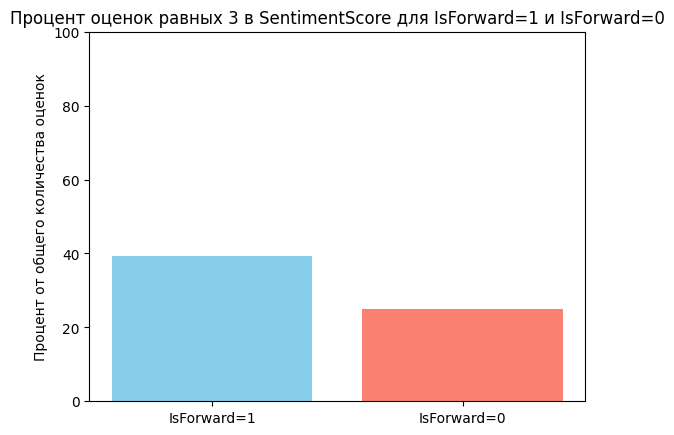

In [ ]:
percentages = data.groupby('IsForward')['SentimentScore'].apply(lambda x: (x == 3).sum() / len(x) * 100)

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.bar(['IsForward=1', 'IsForward=0'], percentages, color=['skyblue', 'salmon'])

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –∏ –º–µ—Ç–æ–∫ –æ—Å–µ–π
plt.title('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ü–µ–Ω–æ–∫ —Ä–∞–≤–Ω—ã—Ö 3 –≤ SentimentScore –¥–ª—è IsForward=1 –∏ IsForward=0')
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ü–µ–Ω–æ–∫')
plt.ylim(0, 100)  # –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –ø—Ä–µ–¥–µ–ª–æ–≤ –æ—Å–∏ y –æ—Ç 0 –¥–æ 100
plt.show()


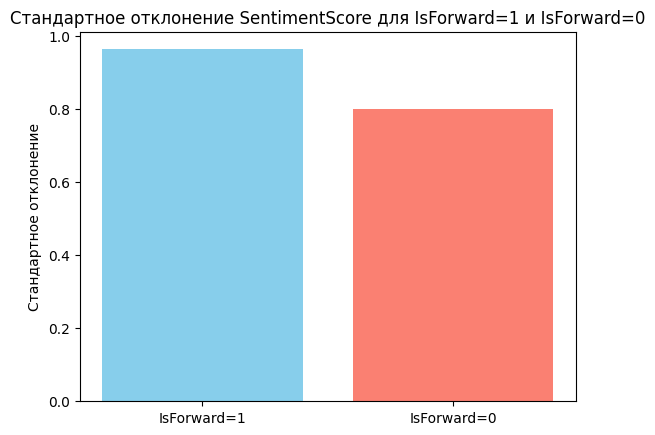

In [ ]:
std_forward = data.loc[data['IsForward'] == 1, 'SentimentScore'].std()
std_not_forward = data.loc[data['IsForward'] == 0, 'SentimentScore'].std()

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.bar(['IsForward=1', 'IsForward=0'], [std_forward, std_not_forward], color=['skyblue', 'salmon'])

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –∏ –º–µ—Ç–æ–∫ –æ—Å–µ–π
plt.title('–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ SentimentScore –¥–ª—è IsForward=1 –∏ IsForward=0')
plt.ylabel('–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ')
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope

def objective(params):
    model = CatBoostClassifier(**params, task_type='GPU')

    model.fit(train_Pool, eval_set=(test_Pool), verbose=100)

    y_pred = model.predict(test_Pool)
    accuracy = accuracy_score(y_test, y_pred)

    return {'loss': -accuracy, 'status': STATUS_OK}

# –ü—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –ø–æ–∏—Å–∫–∞ –≤—Å–µ—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
space = {
    'depth': hp.quniform('depth', 1, 6, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', -3, 3),
    'iterations': hp.quniform('iterations', 100, 5000, 100),
    'border_count': hp.quniform('border_count', 1, 255, 1),
    'thread_count': hp.quniform('thread_count', 1, 16, 1),
}


# –ó–∞–ø—É—Å–∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

print(best)

0:	learn: 1.3784377	test: 1.3613993	best: 1.3613993 (0)	total: 11.2ms	remaining: 16.8s

100:	learn: 0.8665569	test: 0.8885359	best: 0.8876425 (95)	total: 716ms	remaining: 9.91s

200:	learn: 0.7883861	test: 0.8824744	best: 0.8813051 (190)	total: 1.34s	remaining: 8.64s

300:	learn: 0.7327156	test: 0.8839187	best: 0.8812066 (209)	total: 1.94s	remaining: 7.71s

400:	learn: 0.6870540	test: 0.8824205	best: 0.8812066 (209)	total: 2.58s	remaining: 7.09s

500:	learn: 0.6496507	test: 0.8852584	best: 0.8811274 (424)	total: 5.46s	remaining: 10.9s

600:	learn: 0.6148874	test: 0.8809534	best: 0.8809534 (600)	total: 6.52s	remaining: 9.76s

700:	learn: 0.5849099	test: 0.8824886	best: 0.8807913 (602)	total: 7.17s	remaining: 8.17s

800:	learn: 0.5585410	test: 0.8847173	best: 0.8807913 (602)	total: 7.79s	remaining: 6.8s

900:	learn: 0.5338324	test: 0.8849511	best: 0.8807913 (602)	total: 8.41s	remaining: 5.59s

1000:	learn: 0.5111824	test: 0.8875755	best: 0.8807913 (602)	total: 9.05s	remaining: 4.51s

110

–ù–û–í–û–°–¢–¨ –û –ù–ê–õ–û–ì–ï WINDFALLTAX –ò–ú–ï–ï–¢ –†–ï–ô–¢–ò–ù–ì == 2
–ù–û–í–û–°–¢–¨ –û –ü–ê–î–ï–ù–ò–ò –ß–ò–°–¢–û–ô –ü–†–ò–ë–´–õ–ò –ù–ê 65% == 1
–ù–û–í–û–°–¢–¨ –†–£–ë–õ–¨ + –ü–ê–î–ï–ù–ò–ï –ù–ê 20% == 1
–ù–û–í–û–°–¢–¨ IMOEX == SHORT SILVER + GOLD == LONG –†–ï–ô–¢–ò–ù–ì == 1
–ù–û–í–û–°–¢–¨ –û –ó–ê–°–ï–î–ê–ù–ò–ò –ü–†–ò –ù–ï–ó–ù–ê–ß–ò–¢–ï–õ–¨–ù–û–ú –†–û–°–¢–ï == 4

In [ ]:
data['IsForward'] = data['IsForward'].astype(int)

In [ ]:
data

MessageID   ChannelID  issuerid  SentimentScore           DateAdded  \
0        241407  1203560567       153               2 2023-05-12 19:03:20   
1         33684  1136626166       230               4 2023-02-03 20:56:29   
2         10090  1063908560       118               4 2023-06-02 19:18:37   
3         10090  1063908560       220               5 2023-06-02 19:18:37   
4          9826  1063908560        89               2 2023-04-24 17:51:38   
...         ...         ...       ...             ...                 ...   
9284      47482  1197210433       157               4 2023-03-20 14:53:14   
9285     233829  1203560567       157               4 2023-03-20 14:58:04   
9286       9789  1063908560       225               3 2023-04-19 17:51:56   
9287     233867  1203560567       127               3 2023-03-20 14:58:04   
9288      14315  1075101206       112               5 2023-02-07 14:56:26   

              DatePosted                                        MessageText  \
0    2023-05-12 19:02:42  ‚ö†Ô∏èüá∑üá∫#SELG #–¥–∏–≤–∏–¥–µ–Ω–¥  —Å–¥ –°–µ–ª–∏–≥–¥–∞—Ä: –¥–∏–≤–∏–¥–µ–Ω–¥—ã 20...   
1    2023-02-03 16:46:34  Ozon –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç —Ä–∞–∑–≤–∏–≤–∞—Ç—å —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ñ...   
2    2023-06-02 18:50:00  ‚Äã–§–æ–∫—É—Å—ã –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç—Å—èüî•–ê–∫—Ü–∏–∏ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏  üìà–í–¢–ë ...   
3    2023-06-02 18:50:00  ‚Äã–§–æ–∫—É—Å—ã –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç—Å—èüî•–ê–∫—Ü–∏–∏ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏  üìà–í–¢–ë ...   
4    2023-04-24 13:54:00  ‚Äã‚ÄãWindfall Tax ‚Äî –Ω–∞–ª–æ–≥ –Ω–∞ —Å–≤–µ—Ä—Ö–ø—Ä–∏–±—ã–ª—å. –ö–∞–∫–∏–µ ...   
...                  ...                                                ...   
9284 2023-03-20 12:15:21  #FLOT #–î–∏–≤–∏–¥–µ–Ω–¥—ã üí∞ 7% ‚Äî –≤–æ–∑–º–æ–∂–Ω–∞—è –¥–∏–≤–¥–æ—Ö–æ–¥–Ω–æ—Å—Ç...   
9285 2023-03-20 12:05:49  üá∑üá∫#FLOT #–æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å  –ß–ò–°–¢–ê–Ø –ü–†–ò–ë–´–õ–¨ –°–û–í–ö–û–ú–§–õ–û–¢...   
9286 2023-04-19 15:32:00  ‚Äã‚Äã–ö–ª—é—á–µ–≤–æ–π –ø—Ä–∏–Ω—Ü–∏–ø —Å–æ–∑–¥–∞–Ω–∏—è –ø–æ—Ä—Ç—Ñ–µ–ª—è  üîπ–î–∏–≤–µ—Ä—Å–∏...   
9287 2023-03-20 14:33:32  "üí•üá∑üá∫#PLZL #–ª–∏—Å—Ç–∏–Ω–≥ #—Ç–æ—Ä–≥–∏  ""–ü–æ–ª—é—Å"" –≤–µ–¥–µ—Ç –¥–∏–∞...   
9288 2023-02-07 14:28:09  –†–æ—Å–Ω–µ—Ñ—Ç—å (ROSN) —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–∞—è —Ü–µ–Ω–∞ 425.17 —Ä—É–±–ª—è...   

      IsForward  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
9284      False  
9285      False  
9286      False  
9287      False  
9288      False  

[9126 rows x 8 columns]

In [ ]:
gay = data[data['MessageText'].str.contains('–∞–Ω–æ–º–∞–ª—å', case=False)]

In [ ]:
print(data['MessageText'][data['MessageID'].eq(45742).idxmax()])

–£ $PLZL –≤—Å–µ —Ç–∞–∫–∂–µ –ø—Ä–æ—Ö–æ–¥—è—Ç –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞–º–µ—á–∞–µ—Ç –®–ø–∏–æ–Ω –†–¶–ë  –í —Ü–µ–ª–æ–º —Å–ø–µ–∫—É–ª—è—Ç–∏–≤–Ω–æ –µ—Å—Ç—å —à–∞–Ω—Å—ã –Ω–∞ –æ—Ç–∫–∞—Ç –≤ —Å—Ç–æ—Ä–æ–Ω—É 8520-8360, –Ω–æ —Å—Ä–µ–¥–Ω–µ—Å—Ä–æ—á–Ω–æ —ç—Ç–æ —Ä–æ—Å—Ç –∫ —É—Ä–æ–≤–Ω—è–º 9500-10000.  –ë–æ–ª—å—à—É—é —á–∞—Å—Ç—å –ø–æ–∑–∏—Ü–∏–∏ –ø—Ä–æ–¥–∞—Ç—å —Å—Ç–æ–∏—Ç, –Ω–æ —Ç–∞–∫ –∫–∞–∫ –æ–±—ä–µ–º—ã –Ω–∞ –ø–æ–∫—É–ø–∫—É –ø—Ä–æ—Ö–æ–¥—è—Ç, —Ç–æ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –¥–æ–∫—É–ø–∞—Ç—å –Ω–∞ 8360 –∏ –Ω–∏–∂–µ! –ù–µ –¥—É–º–∞—é, —á—Ç–æ –≤ –±–ª–∏–∂–∞–π—à–µ–µ –≤—Ä–µ–º—è —É–∫–∞—Ç—è—Ç –Ω–∞ 8000 –∏ –Ω–∏–∂–µ!


In [ ]:
score = pd.read_csv('sentiment.csv')
del score['Unnamed: 0']
score

MessageID   ChannelID  issuerid  SentimentScore
0         241407  1203560567       153               2
1          33684  1136626166       230               4
2          10090  1063908560       118               4
3           9826  1063908560        89               2
4           9672  1063908560       160               2
...          ...         ...       ...             ...
10926       9789  1063908560       225               3
10927       4789  1239405989       127               3
10928     233867  1203560567       127               3
10929       3681  1219484576       127               3
10930      14315  1075101206       112               5

[10931 rows x 4 columns]

In [ ]:
data[(data['DatePosted'] <= '2023-02-01') & (data['SentimentScore'] <= 2)]

MessageID   ChannelID  issuerid  SentimentScore           DateAdded  \
1293     226422  1203560567        53               2 2023-01-24 21:00:01   
1305     225966  1203560567       223               2 2023-01-20 15:01:22   
1312     226393  1203560567       236               2 2023-01-24 15:00:48   
1346     226715  1203560567        32               2 2023-01-26 15:01:25   
2313       9246  1063908560         4               2 2023-01-26 20:55:07   
...         ...         ...       ...             ...                 ...   
8714      12638  1001029560       235               0 2022-12-26 14:37:23   
8915     227436  1203560567         7               2 2023-01-31 20:59:51   
9185       6678  1215658351       230               0 2023-01-19 21:02:06   
9214     225762  1203560567         4               2 2023-01-19 15:01:45   
9237      45742  1197210433       127               2 2023-01-26 14:58:11   

              DatePosted                                        MessageText  \
1293 2023-01-24 15:38:48  üá∑üá∫#GMKN  –ù–æ—Ä–Ω–∏–∫–µ–ª—å –∏–∑-–∑–∞ –ø—Ä–æ–±–ª–µ–º —Å –∫–æ–º–ø–ª–µ–∫—Ç—É—é—â...   
1305 2023-01-20 09:34:05  ‚ö†Ô∏èüá∑üá∫#—Å–æ—Ü—Å–µ—Ç–∏ #—Ä–æ—Å—Å–∏—è #YNDX #VKCO –°–æ—Ü–∏–∞–ª—å–Ω—ã–µ —Å–µ...   
1312 2023-01-24 14:15:46  "‚ö†Ô∏èüá∑üá∫#YNDX  –≤ –ú–æ–ª–¥–∞–≤–∏–∏ –ø—Ä–æ–≤–µ—Ä—è—Ç ""–Ø–Ω–¥–µ–∫—Å.–¢–∞–∫—Å–∏...   
1346 2023-01-26 11:32:07  üá∑üá∫#AFLT #–æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å  –ì–†–£–ü–ü–ê –ê–≠–†–û–§–õ–û–¢ –°–û–ö–†–ê–¢–ò–õ–ê...   
2313 2023-01-26 17:01:37  ‚Äã‚Äã–ü–æ–∞–ª—Ä–æ—Å–∏–ª–∏ –∏ –±—Ä–æ—Å–∏–ª–∏? –ü–æ—Ç—É—Å–∫–Ω–µ–ª–∏ –ª–∏ –∞–ª–º–∞–∑—ã –†...   
...                  ...                                                ...   
8714 2022-12-26 13:53:40  ‚ùì –ù–∞ —á–µ–º –º–æ–∂–Ω–æ –∑–∞—Ä–∞–±–æ—Ç–∞—Ç—å –≤ –ø–æ—Å–ª–µ–¥–Ω—é—é –Ω–µ–¥–µ–ª—é –≥...   
8915 2023-01-31 17:29:38  ‚ö†Ô∏èüá∑üá∫#VTBR #–¥–∏–≤–∏–¥–µ–Ω–¥ #–ø—Ä–æ–≥–Ω–æ–∑  Frank Media: –í–¢–ë...   
9185 2023-01-19 18:07:36  –ú–æ—Å–±–∏—Ä–∂–∞ –≤ –º–æ–º–µ–Ω—Ç–µ  –ò–Ω–¥–µ–∫—Å –ú–æ—Å–ë–∏—Ä–∂–∏ –≤ —Ö–æ–¥–µ —Å–µ–≥...   
9214 2023-01-19 09:47:27  ‚ö†Ô∏èüíé#–∞–ª–º–∞–∑—ã #–ø—Ä–æ–≥–Ω–æ–∑  –ê–Ω–∞–ª–∏—Ç–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É—é—Ç —Å–Ω...   
9237 2023-01-26 10:14:59  –£ $PLZL –≤—Å–µ —Ç–∞–∫–∂–µ –ø—Ä–æ—Ö–æ–¥—è—Ç –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏,...   

      IsForward  
1293          0  
1305          0  
1312          0  
1346          0  
2313          0  
...         ...  
8714          0  
8915          0  
9185          0  
9214          0  
9237          1  

[125 rows x 8 columns]

In [ ]:
data[(data['DateAdded'] >= '2023-05-01') & (data['SentimentScore'] >= 3)]

MessageID   ChannelID  issuerid  SentimentScore           DateAdded  \
2         10090  1063908560       118               4 2023-06-02 19:18:37   
3         10090  1063908560       220               5 2023-06-02 19:18:37   
30       239758  1203560567       103               3 2023-05-01 19:03:46   
67         3769  1172556372       103               4 2023-06-23 19:21:23   
314        3542  1160971567       225               3 2023-09-09 13:20:10   
...         ...         ...       ...             ...                 ...   
9264       6262  1480181440       111               4 2023-08-30 19:43:09   
9273     255289  1203560567       111               4 2023-08-30 19:24:47   
9278     243244  1203560567       103               4 2023-05-25 19:07:02   
9279       3724  1172556372       103               4 2023-06-05 19:23:10   
9281      17613  1197296889       111               4 2023-08-30 19:24:43   

              DatePosted                                        MessageText  \
2    2023-06-02 18:50:00  ‚Äã–§–æ–∫—É—Å—ã –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç—Å—èüî•–ê–∫—Ü–∏–∏ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏  üìà–í–¢–ë ...   
3    2023-06-02 18:50:00  ‚Äã–§–æ–∫—É—Å—ã –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç—Å—èüî•–ê–∫—Ü–∏–∏ –∏ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–∏  üìà–í–¢–ë ...   
30   2023-05-01 08:52:26  üóì–ö–ê–õ–ï–ù–î–ê–†–¨ –ù–ê –°–ï–ì–û–î–ù–Ø ‚Äî 2023.05.01  üìå–¢–û–†–ì–ò –ì–µ—Ä...   
67   2023-06-23 13:40:47  "–ú–æ—Å–∫–æ–≤—Å–∫–∞—è –±–∏—Ä–∂–∞ 29 –∏—é–Ω—è –Ω–∞—á–Ω–µ—Ç —Ç–æ—Ä–≥–∏ –Ω–∞ —Å—Ä–æ—á...   
314  2023-09-09 11:25:01  "üìã–ò—Ç–æ–≥–∏ –Ω–µ–¥–µ–ª–∏  üá∑üá∫üè¶–†–æ—Å—Å—Ç–∞—Ç –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª –ø—Ä–µ–¥–≤–∞—Ä–∏...   
...                  ...                                                ...   
9264 2023-08-30 17:24:33  üõ¢ –õ—É–∫–æ–π–ª: –∫–∞–∫ –¥–æ–ª–≥–æ –ø—Ä–æ–¥–ª–∏—Ç—Å—è —Ç—É–∑–µ–º—É–Ω?  –° –ø—Ä–æ—à...   
9273 2023-08-30 16:17:43  ‚ùóÔ∏èüá∑üá∫#LKOH #buyback –í–õ–ê–°–¢–ò –†–§ –†–ê–°–°–ú–ê–¢–†–ò–í–ê–Æ–¢ –û–ë–†...   
9278 2023-05-25 18:24:14  "üåïüá∑üá∫#–±–æ–Ω–¥—ã #–∑–æ–ª–æ—Ç–æ #—Ä–æ—Å—Å–∏—è  –≠–º–∏—Ç–µ–Ω—Ç—ã –≥–æ—Ç–æ–≤—è—Ç –Ω...   
9279 2023-06-05 16:56:58  –ú–æ—Å–±–∏—Ä–∂–∞  –í –º–∞–µ —á–∏—Å–ª–æ —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –ª–∏—Ü, –∏–º–µ—é—â–∏—Ö ...   
9281 2023-08-30 16:17:43  –ù–û–í–ê–ö: –í–õ–ê–°–¢–ò –†–§ –†–ê–°–°–ú–ê–¢–†–ò–í–ê–Æ–¢ –û–ë–†–ê–©–ï–ù–ò–ï –õ–£–ö–û–ô...   

      IsForward  
2             0  
3             0  
30            0  
67            0  
314           0  
...         ...  
9264          0  
9273          0  
9278          0  
9279          0  
9281          0  

[5100 rows x 8 columns]

–ì—Ä–∞—Ñ–∏–∫–∏

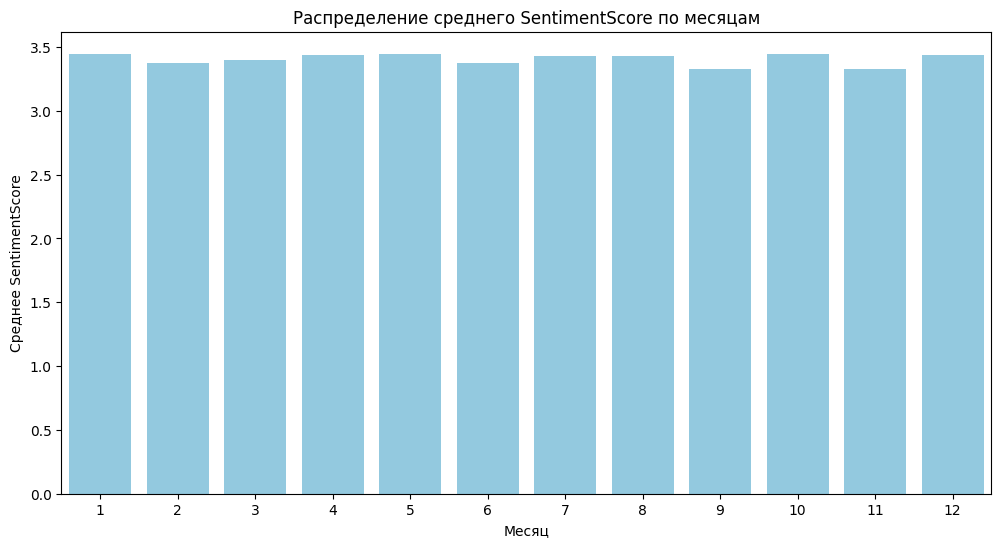

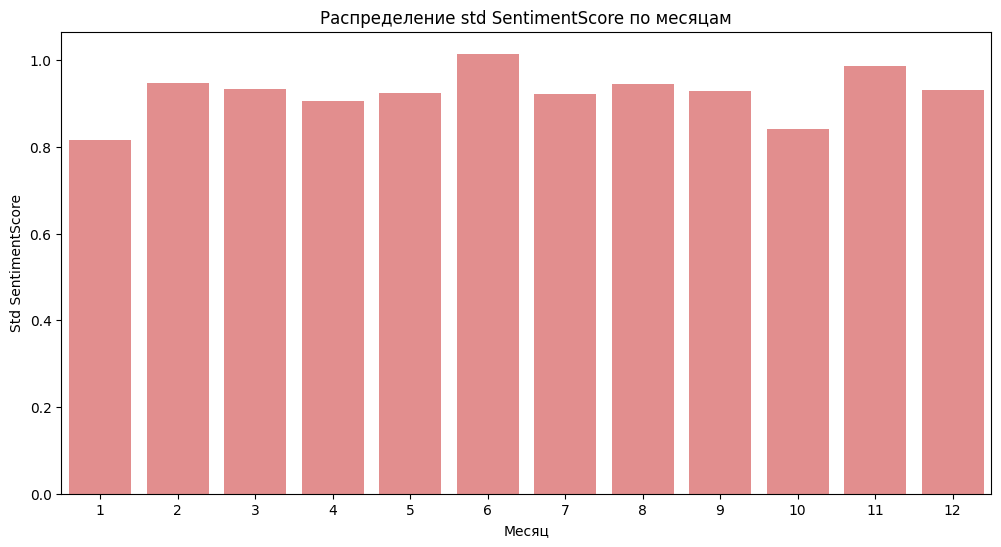

In [ ]:
data['DatePosted'] = pd.to_datetime(df['DatePosted'])
data['Month'] = data['DatePosted'].dt.month

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –ø–æ –º–µ—Å—è—Ü—É –∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ std SentimentScore
grouped = data.groupby('Month')['SentimentScore'].agg(['mean', 'std']).reset_index()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å—Ä–µ–¥–Ω–µ–≥–æ SentimentScore –ø–æ –º–µ—Å—è—Ü–∞–º
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='mean', data=grouped, color='skyblue')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–°—Ä–µ–¥–Ω–µ–µ SentimentScore')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ SentimentScore –ø–æ –º–µ—Å—è—Ü–∞–º')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ std SentimentScore –ø–æ –º–µ—Å—è—Ü–∞–º
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='std', data=grouped, color='lightcoral')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('Std SentimentScore')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ std SentimentScore –ø–æ –º–µ—Å—è—Ü–∞–º')

plt.show()